In [ ]:
# 심층신경망
# 데이터 가져오기
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = \
                            keras.datasets.fashion_mnist.load_data()

In [ ]:
train_scaled = train_input / 255.0            # 0~1사이의 값으로 정규화.
train_scaled = train_scaled.reshape(-1,28*28)

In [ ]:
# 데이터 나누기 (훈련데이터와 테스트 데이터로 나누기)
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = \
                  train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)


In [ ]:
# 심층 신경망 - 2층 신경망 만들기
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')
model = keras.Sequential([dense1, dense2])
model.summary()

In [ ]:
# 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.5627 - accuracy: 0.8096
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4072 - accuracy: 0.8543
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3739 - accuracy: 0.8652
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3513 - accuracy: 0.8731
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3347 - accuracy: 0.8777


In [ ]:
# ReLU 함수 사용
# dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
# dense2 = keras.layers.Dense(10, activation='softmax')
# model = keras.Sequential([dense1, dense2])
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(784,)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 훈련
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

In [ ]:
# 분석을 위한 준비과정
history = model.fit(train_scaled, train_target, epochs=5, verbose=0) # verbose=0 훈련과정을
print(history.history.keys())                                        # 나타내지 않음

dict_keys(['loss', 'accuracy'])


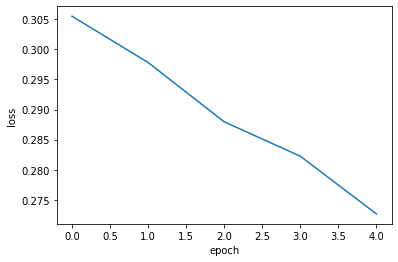

In [ ]:
# epoch vs loss 그래프 그리기
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

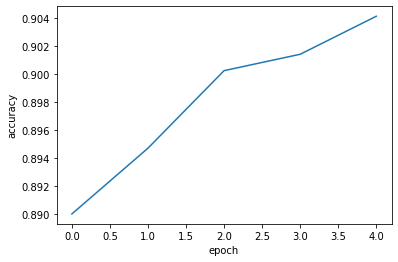

In [ ]:
# accuracy 출력
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()